# MATH 210 Introduction to Mathematical Computing

## January 27, 2017

1. Python modules and packages
    * Creating our own number theory module
    * Importing a module
    * Example: Sums of squares
2. An overview of scientific computing in Python
    * NumPy, SciPy, matplotlib and pandas
    * Example: Plotting functions with NumPy and matplotlib
3. Exercises

## 1. Python modules and packages

So far we have been using the standard [Python library](https://docs.python.org/3/library/) consisting of [builtin functions](https://docs.python.org/3/library/functions.html) (like `sum`, `len`, `round`, etc) and [buitlin datatypes](https://docs.python.org/3/library/stdtypes.html) (like `int`, `float`, `list`, etc). But what if we want to do more like work with matrices and exponential functions and trigonometric functions? Python packages NumPy, SciPy, matplotlib, pandas and many more have been built for scientific computing and many other applications!

What is a package or a module? A [module](https://docs.python.org/3/tutorial/modules.html) is simply a collection of functions and other things saved to a `.py` file (just a text file containing Python code). A [package](https://docs.python.org/3/tutorial/modules.html#packages) is a whole collection of modules.

### Creating our own number theory module

Let's make our own module by assembling all our functions related to number theory! Create a new text file (in the same directory as this notebook) called `number_theory.py` (the extension `.py` let's our operating system know that it's a text file with Python code) and paste all the functions in the cell below:

In [1]:
# number_theory.py

# A module containing functions related to number theory
# UBC Math 210 Introduction to Mathematical Computing
# January 27, 2017

def factorial(N):
    """Compute N!=N(N-1) ... (2)(1)."""
    # Initialize the outpout variable to 1
    product = 1
    for n in range(2,N + 1):
        # Update the output variable
        product = product * n
    return product

def n_choose_k(N,K):
    """Compute N choose K."""
    return factorial(N) // (factorial(N - K) * factorial(K))

def divisors(N):
    """Return the list of divisors of N."""
    # Initialize the list of divisors
    divisor_list = [1]
    # Check division by d for d <= N/2
    for d in range(2,N // 2 + 1):
        if N % d == 0:
            divisor_list.append(d)
    divisor_list.append(N)
    return divisor_list

def is_square(N):
    """Determine is N is square."""
    return N == round(N**(0.5))**2

def rep_as_squares(N):
    """Find all representations of N as a sum of squares a**2 + b**2 = N."""
    reps = []
    stop = int((N/2)**0.5) + 1 # a must be less than \sqrt{N/2}
    for a in range(1,stop):
        b_squared = N - a**2
        if is_square(b_squared):
            b = round((b_squared)**(0.5))
            reps.append([a,b])
    return reps

def collatz(a):
    """Compute the Collatz sequence starting at a."""
    # Initialze the sequence with the fist value a.
    x_list = [a]
    # Continue computing values in the sequence until we reach 1.
    while x_list[-1] != 1:
        # Check if the last element in the list is even
        if x_list[-1] % 2 == 0:
            # Compute and append the new values
            x_list.append(x_list[-1] // 2)
        else:
            # Compute and append the new values
            x_list.append(3*x_list[-1] + 1)
    return x_list

def is_prime(N):
    "Determine whether or not N is a prime number."
    if N <= 1:
        return False
    # N is prime if N is only divisible by 1 and itself
    # We should test whether N is divisible by d for all 1 < d < N
    for d in range(2,N):
        # Check if N is divisible by d
        if N % d == 0:
            return False
    # If we exit the for loop, then N is not divisible by any d
    # Therefore N is prime
    return True

### Importing a module

We import our module using the `import` keyword:

In [2]:
import number_theory

Now all the functions in the file `number_theory.py` are available to us! We use the dot notation to access them by name!

In [3]:
number_theory.is_prime(2017)

True

In [4]:
number_theory.rep_as_squares(2017)

[[9, 44]]

In [5]:
9**2 + 44**2

2017

In [6]:
number_theory.is_square(9)

True

In [7]:
number_theory.rep_as_squares(2000000)

[[200, 1400], [584, 1288], [680, 1240], [1000, 1000]]

### Example: Sums of squares

Let's find the smallest integer that can be expressed as a sum of squares in 4 different ways.

In [8]:
# After some trial and error, we find the smallest integer
# that can be written as a sum of squares in 4 ways
for N in range(1,1200):
    reps = number_theory.rep_as_squares(N)
    if len(reps) > 2:
        print(N,' - ',reps)

325  -  [[1, 18], [6, 17], [10, 15]]
425  -  [[5, 20], [8, 19], [13, 16]]
650  -  [[5, 25], [11, 23], [17, 19]]
725  -  [[7, 26], [10, 25], [14, 23]]
845  -  [[2, 29], [13, 26], [19, 22]]
850  -  [[3, 29], [11, 27], [15, 25]]
925  -  [[5, 30], [14, 27], [21, 22]]
1025  -  [[1, 32], [8, 31], [20, 25]]
1105  -  [[4, 33], [9, 32], [12, 31], [23, 24]]


## 2. An overview of scientific computing in Python

The [SciPy](http://scipy.org/) stack referes to the collectin of Python packages for scientific computing in Python. We will focus on 4 core packages:

* [NumPy](http://www.numpy.org/): array and functions for fast efficient array computations
* [SciPy](http://scipy.org/): library of scientific functions
* [matplotlib](http://matplotlib.org/): plotting library
* [pandas](http://pandas.pydata.org/): data analysis

### Examples: Plotting functions with NumPy and matplotlib

Let's do some quick examples using NumPy and matpolotlib to plot functions! First, we import the packages:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

**We must include the Jupyter cell magic `%matplotlib inline` for plots to render in the notebook!**

In [10]:
%matplotlib inline

**Example.** Let's plot the function

$$
y = \cos(x) \ \ , \ 0 \leq x \leq \pi
$$

Create an array of 100 values between 0 and $\pi$:

In [11]:
x = np.linspace(0,np.pi,101)

Compute $\cos(x)$ for every value in the array $x$ and save the array of $y$ values:

In [12]:
y = np.cos(x)

Plot the corresponding line!

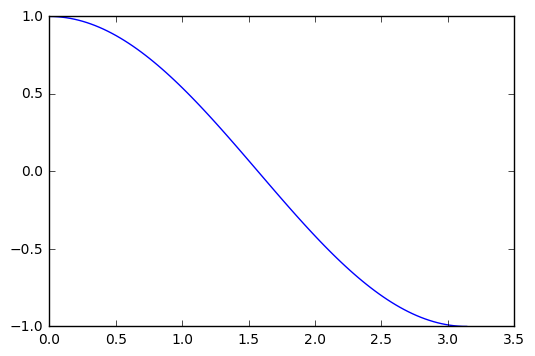

In [13]:
plt.plot(x,y);

**Example.** Let's try another example! Let's plot the function:

$$
y = e^{-x^2} \cos(10x) \ \ , \ -5 \leq x \leq 5
$$

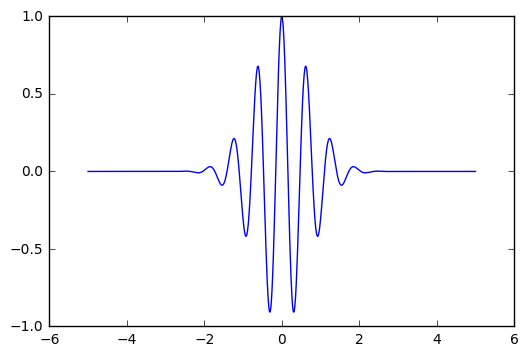

In [14]:
x = np.linspace(-5,5,1000)
y = np.exp(-x**2) * np.cos(10*x)
plt.plot(x,y);

**Example.** There are **many** commands in `matplotlib.pyplot` for us to use to format our plots. Checkout the [Matplotlib](http://matplotlib.org/api/pyplot_summary.html) documentation. Here are a few commands:

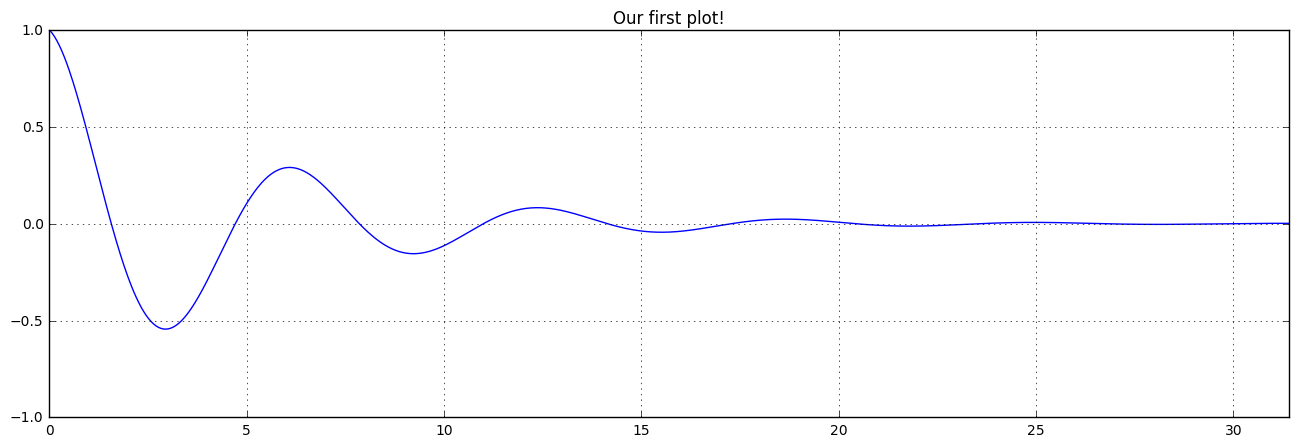

In [15]:
x = np.linspace(0,10*np.pi,1000)
y = np.exp(-0.2*x) * np.cos(x)
plt.figure(figsize=(16,5)) # Make the figure 12 units wide by 5 units high
plt.plot(x,y)
plt.xlim([0,10*np.pi]) # Set the window width display to [0,10*\pi]
plt.ylim([-1,1]) # Set the window height display to [-1,1]
plt.grid('on') # Show grid lines
plt.title('Our first plot!'); # Add a title

## 3. Exercises

**Exercise 1.** Plot the function $f(x) = \sin(x) + \sin(2x)$ for $x \in [-2\pi,2\pi]$.

**Exercise 2.** Plot the function $f(x) = x \ln(x)$ for $x \in [0,3]$.

**Exercise 3.** Plot the function $f(x) = \sqrt{|x|}$ for $x \in [-9,9]$.

**Exercise 4.** Plot the function $f(x) = \arctan(x)$ for $x \in [-10,10]$.